In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from numpy import zeros,zeros_like,array
from mpl_toolkits.axes_grid1 import ImageGrid

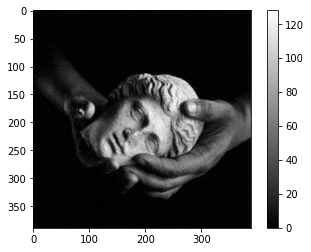

In [76]:
input_file = "../data/statue.png"
input_image = 255.0*mpimg.imread(input_file,format="png")
plt.imshow(input_image,cmap="gray")
plt.colorbar()

In [71]:
new_image = np.zeros_like(input_image)
for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
        if input_image[i][j] < np.mean(input_image)+40:
            new_image[i][j]=0
        else:
            new_image[i][j]=1

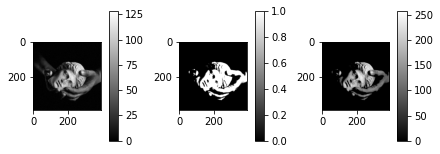

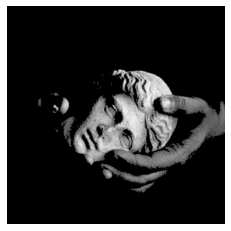

In [72]:
masked_image = np.multiply(new_image , input_image)
fig,axes = plt.subplots(1,3, constrained_layout=True, gridspec_kw={'width_ratios':[1,1,1]})
axes[0].imshow(input_image,cmap="gray")
axes[0].axis("on")
cbar = fig.colorbar(im,ax=axes[0],shrink=0.45)
im = axes[1].imshow(new_image,cmap="gray")
axes[1].axis("on")
cbar = fig.colorbar(im,ax=axes[1],shrink=0.45)
im = axes[2].imshow(masked_image,cmap="gray")
axes[2].axis("on")

#cbar = fig.colorbar(im,ax=axes.ravel().tolist(),ticks=[0,255])
#cbar.ax.set_yticklabels([0,255])
cbar = fig.colorbar(im,ax=axes[2],shrink=0.45)
plt.show()
plt.imshow(masked_image,cmap="gray")
plt.axis("off")
plt.savefig("../data/MaskedStatue.png",bbox_inches='tight')

In [11]:
input_file = "../data/chestXray.png"
input_image =255*mpimg.imread(input_file,format="png")
input_image.shape
#np.min(input_image)

0.0

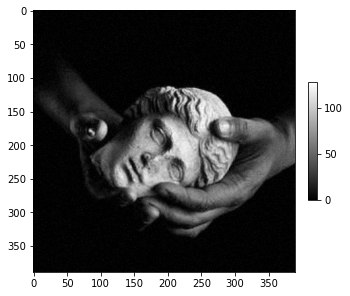

In [62]:
fig,axes = plt.subplots(1,1, constrained_layout=True, gridspec_kw={'width_ratios':[1]})
im=axes.imshow(input_image,cmap="gray")
axes.axis("on")
# im = axes[1].imshow(new_image,cmap="gray")
# axes[1].axis("on")
# im = axes[2].imshow(masked_image,cmap="gray")
# axes[2].axis("on")
cbar = fig.colorbar(im,ax=axes,shrink=0.45)
plt.show()

In [5]:
hist, bins = np.histogram(input_image, bins = [i for i in range(0,int(np.max(input_image)),20)])  

In [34]:
def truncate(array):
    r,c = array.shape
    for i in range(r):
        for j in range(c):
            if array[r,c]<0:
                array[r,c] = 0
            elif array[r,c]>1.0:
                array[r,c] = 1.0
    return array
        

def contrast_stretching(input_file,tune=0.375,cmap="gray"):
    input_image = mpimg.imread(input_file,format="png")
    d = 1
    if len(input_image.shape)>2:
        r,c,d = input_image.shape
    else:
        r,c = input_image.shape
    
    if d==1:
        minimum = np.min(input_image)
        maximum = np.max(input_image)
        new_image=np.zeros_like(input_image)
        for i in range (input_image.shape[0]):
            for j in range(input_image.shape[1]):
                input_pixel = input_image[i][j]
                x= input_pixel - minimum -tune

                if x>=0:
                    out = (x)/(maximum-minimum)
                else:
                    out=0
                new_image[i][j]=out
    else:
        minimum = np.min(input_image)
        maximum = np.max(input_image)
        #avg = np.mean(input_image)
        f = 1.016*(1+tune)/(1.016-tune)
        new_image=np.zeros_like(input_image)
        for k in range(d):
            new_image[:,:,k] = truncate(f*(input_image[:,:,k] - 0.5) + 0.5)
#             for i in range (input_image.shape[0]):
#                 for j in range(input_image.shape[1]):
#                     input_pixel = input_image[i][j][k]
#                     x= input_pixel - minimum - tune
#                     if x>=0:
#                         out = (x)/(maximum-minimum)
#                         #out = x
#                     else:
#                         out=0
#                     new_image[i][j][k]=out
                    
       
    
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,1]})
    axes[0].imshow(input_image,cmap="gray")
    axes[0].axis("on")
    axes[1].imshow(new_image,cmap="gray")
    axes[1].axis("on")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


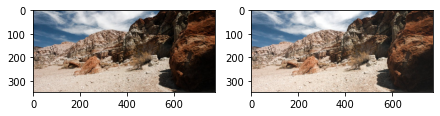

In [50]:
# input_file = "../data/chestXray.png"
# contrast_stretching(input_file)
# input_file = "../data/barbara.png"
# contrast_stretching(input_file,tune=0.20)
# input_file = "../data/MaskedStatue.png"
# contrast_stretching(input_file,tune=0)
# input_file = "../data/church.png"
# image = mpimg.imread(input_file)
# d = image.shape[-1]
# for i in range(d):
#     plt.subplot(1,3,i+1)
#     plt.hist(image[:,:,i])

# contrast_stretching(input_file,tune=-0.5)
input_file = "../data/canyon.png"
contrast_stretching(input_file,tune=-0.5)
# input_file = "../data/TEM.png"
# contrast_stretching(input_file,tune=0.5)

In [140]:
# def myHE(input_image,cmap="gray"):
#     hist,bin_edges = np.histogram(input_image)
#     plt.bar(bin_edges[:-1], hist, color='#0504aa',alpha=0.7,width = 1.5)
#     cdf = np.cumsum(hist)
    
    
#     plt.show()

def truncate(array):
    if array<0:
        array = 0
    elif array>255.0:
        array = 255.0
    return array

def histogram_equalize(input_image,cmap="gray"):
    #input_file = "../data/chestXray.png"
    #input_image = 255*mpimg.imread(input_file,format="png")
    new_image = np.zeros_like(input_image)
    print(new_image.shape)
    d = 1
    if len(input_image.shape)>2:
        r,c,d = input_image.shape
    else:
        r,c = input_image.shape
    print(d)
    
    if d==1:
        new_input = 255*input_image
        maximum = int(np.max(new_input))
        freqs = np.zeros((maximum+1,1))
        probf = np.zeros((maximum+1,1))
        cum = np.zeros((maximum+1,1))
        probc = np.zeros((maximum+1,1))
    
        for i in range(r):
            for j in range(c):
                freqs[int(new_input[i][j])]+=1
    
        for i,j in enumerate(freqs):
            probf[i] = freqs[i]/(r*c)
    
        for i,j in enumerate(probf):
            for k in range(i):
                cum[i] += probf[k]
        #probc[i] = cum[i]/255
    
        for i in range(r):
            for j in range(c):
            #new_image[i][j] = probc[int(input_image[i][j])]*255 #*input_image[i][j]
                new_image[i,j] = cum[int(new_input[i][j])]*maximum
                #print(new_image[i,j])
                
    else:
        for k in range(d):
            new_input = 255*input_image[:,:,k]
            maximum = int(np.max(new_input))
            freqs = np.zeros((maximum+1,1))
            probf = np.zeros((maximum+1,1))
            cum = np.zeros((maximum+1,1))
            probc = np.zeros((maximum+1,1))
            
            for i in range(r):
                for j in range(c):
                    freqs[int(new_input[i,j])]+=1
    
            for i,j in enumerate(freqs):
                probf[i] = freqs[i]/(r*c)
    
            for i,j in enumerate(probf):
                for l in range(i):
                    cum[i] += probf[l]
                    
            for i in range(r):
                for j in range(c):
                #new_image[i][j] = probc[int(input_image[i][j])]*255 #*input_image[i][j]
                    new_image[i,j,k] = cum[int(new_input[i,j])]
            
            
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,1]})
    axes[0].imshow(input_image,cmap="gray")
    axes[0].axis("on")
    im = axes[1].imshow(new_image,cmap="gray")
    axes[1].axis("on")
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink=0.45)
    plt.show()

(1200, 1800, 3)
3


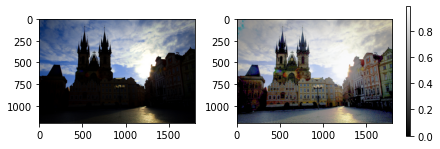

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


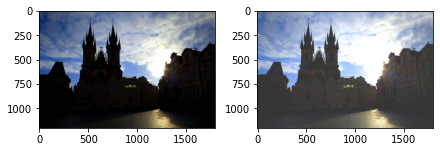

In [141]:
#input_file = "../data/canyon.png"
input_file = "../data/church.png"
#input_file = "../data/TEM.png"
input_image = mpimg.imread(input_file,format="png")
histogram_equalize(input_image)
contrast_stretching(input_file,tune=-0.5)